In [105]:
import pickle
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
with open('Human_Promoter_Analysis_euclidean_v8/Stored_Values/PAttn_batch-0.pckl','rb') as f:
    data = pickle.load(f)

In [3]:
data.shape

(256, 100, 800)

In [4]:
data[0].shape

(100, 800)

### Depiction of self-attention scores across all 8 heads: an example

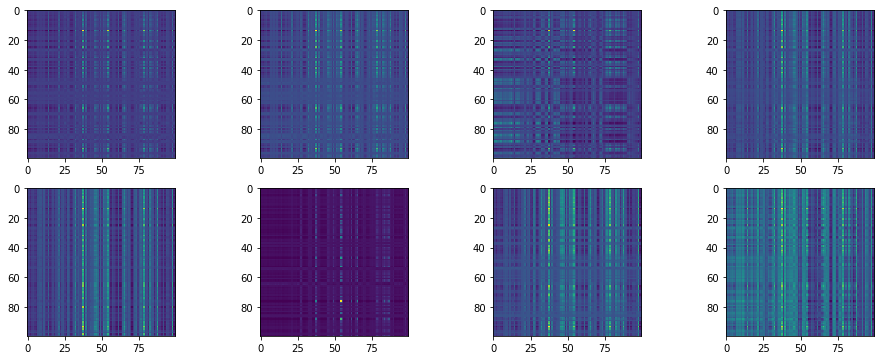

In [5]:
#figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(2, 4, figsize=(16,6))
i = 0
for row in ax:
    for col in row:
        col.imshow(data[0][:,i*100:(i+1)*100])
        i += 1

In [6]:
with open('Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/interaction_keys_dict.pckl','rb') as f:
    intr_keys = pickle.load(f)

In [7]:
with open('Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/main_results_raw.pckl','rb') as f:
    attentions, positions, seqposes = pickle.load(f)

In [8]:
seqposes[0][1][0], list(seqposes[0][0].keys())[0]

(0, '>chr12:49371540-49372140(+)')

In [9]:
df = pd.read_csv('Human_Promoter_Analysis_euclidean_v8/Motif_Analysis/tomtom/tomtom.txt',sep='\t')

In [10]:
df.head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation
0,filter0,M1592_1.02,-3.0,2.055640e-07,0.000151,0.000295,8.0,GAATTTGTATAAT,ATTGTTTT,-
1,filter0,M1605_1.02,-3.0,9.864270e-07,0.000723,0.000709,10.0,GAATTTGTATAAT,ATTCATCTTT,+
2,filter0,M0408_1.02,-2.0,4.973820e-06,0.003646,0.001787,10.0,GAATTTGTATAAT,ATGTGCACAT,+
3,filter0,M0607_1.02,-4.0,6.611760e-06,0.004846,0.001863,9.0,GAATTTGTATAAT,GCGTAAATA,+
4,filter0,M0942_1.02,-4.0,8.898670e-06,0.006523,0.001863,8.0,GAATTTGTATAAT,TTGTAATT,+


In [50]:
df_gby = df.groupby('Target_ID')['Query_ID'].value_counts()

In [210]:
df_intr = pd.read_csv('Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt',sep='\t')

In [211]:
df_intr.shape

(616, 12)

In [212]:
df_intr = df_intr[(df_intr['motif1_qval']<0.01) & (df_intr['motif2_qval']<0.01)]

In [213]:
df_intr.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter0<-->filter21,20,M1592_1.02,0.000295,M0891_1.02,0.003707,30.0,522.0,160.0,282.0,2.607746e-05,3.502893e-05
1,filter0<-->filter101,100,M1592_1.02,0.000295,M1110_1.02,0.004396,30.0,30.0,189.0,382.0,3.989510e-08,8.383226e-08
3,filter0<-->filter133,132,M1592_1.02,0.000295,M0609_1.02,0.004863,120.0,312.0,231.0,334.0,6.041287e-25,3.089641e-23
44,filter2<-->filter21,415,M1605_1.02,0.002335,M0891_1.02,0.003707,342.0,546.0,60.0,204.0,4.641630e-03,4.964796e-03
45,filter2<-->filter23,417,M1605_1.02,0.002335,M0891_1.02,0.009776,324.0,486.0,75.0,234.0,1.198991e-11,5.095713e-11


In [214]:
df_intr = df_intr[df_intr['adjusted_pval']<0.05]

In [215]:
df_intr.shape

(155, 12)

In [216]:
df_intr['filter1'] = df_intr['filter_interaction'].apply(lambda x: x.split('<-->')[0])
df_intr['filter2'] = df_intr['filter_interaction'].apply(lambda x: x.split('<-->')[1])
df_intr['motif_interaction'] = df_intr.apply(lambda x: x['motif1']+'<-->'+x['motif2'], axis=1)

In [217]:
df_intr.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,filter1,filter2,motif_interaction
0,filter0<-->filter21,20,M1592_1.02,0.000295,M0891_1.02,0.003707,30.0,522.0,160.0,282.0,2.607746e-05,3.502893e-05,filter0,filter21,M1592_1.02<-->M0891_1.02
1,filter0<-->filter101,100,M1592_1.02,0.000295,M1110_1.02,0.004396,30.0,30.0,189.0,382.0,3.989510e-08,8.383226e-08,filter0,filter101,M1592_1.02<-->M1110_1.02
3,filter0<-->filter133,132,M1592_1.02,0.000295,M0609_1.02,0.004863,120.0,312.0,231.0,334.0,6.041287e-25,3.089641e-23,filter0,filter133,M1592_1.02<-->M0609_1.02
44,filter2<-->filter21,415,M1605_1.02,0.002335,M0891_1.02,0.003707,342.0,546.0,60.0,204.0,4.641630e-03,4.964796e-03,filter2,filter21,M1605_1.02<-->M0891_1.02
45,filter2<-->filter23,417,M1605_1.02,0.002335,M0891_1.02,0.009776,324.0,486.0,75.0,234.0,1.198991e-11,5.095713e-11,filter2,filter23,M1605_1.02<-->M0891_1.02


In [218]:
motif1 = df_intr['motif1'][0]
motif2 = df_intr['motif2'][0]
print(motif1,motif2)

M1592_1.02 M0891_1.02


In [219]:
list1 = df_gby[motif1]

In [220]:
list2 = df_gby[motif2]

In [249]:
comb_list = []
for f1 in list1.keys():
    if f1 in list2.keys():
            continue
    for f2 in list2.keys():
        if f2 in list1.keys():
            continue
        comb_list.append(f"{f1}<-->{f2}")
        comb_list.append(f"{f2}<-->{f1}")

In [250]:
len(comb_list)

264

In [251]:
similar_fltrs_interactions = df_intr[df_intr['filter_interaction'].isin(comb_list)]

In [252]:
len(similar_fltrs_interactions)

8

In [253]:
tp_indices = []
for i in range(0, len(seqposes)):
    tp_indices += seqposes[i][1]

In [254]:
len(tp_indices)

544

In [255]:
attns = {}
for i in tp_indices:
    for key in similar_fltrs_interactions['filter_interaction']:
        index = intr_keys[key]
        attn = attentions[index, i]
        if attn >= 0.12:
            if i not in attns:
                attns[i] = [[key, attn]]
            else:
                attns[i].append([key,attn])

In [256]:
attns
x = []
y = []
for key,value in attns.items():
    x.append(key)
    y.append(np.asarray(value)[:,1].astype(float))

In [257]:
attention_nonneg = attentions.flatten()
attn_nng = attention_nonneg[attention_nonneg>=0.12]

### Distribution of interaction scores for redundant motif filters
Box and whisker plot using interaction scores between all filters learning motif-A and those that learn motif-B (filters that learn redundant motifs) is shown for 8 example sequences. For reference, the distribution scores across the whole dataset (for all filter-filter inteactions) is shown as well.

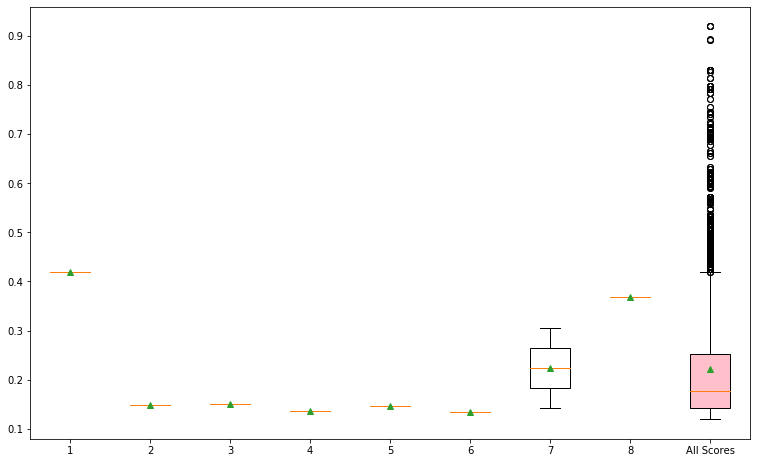

In [296]:
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_axes([0,0,1,1]) 
bplot = ax.boxplot(y+[attn_nng], showmeans=True, patch_artist=True)
plt.xticks([i for i in range(1, len(y)+2)], [i for i in range(1, len(y)+1)]+['All Scores'])
for i in range(0, len(bplot['boxes'])-1):
    bplot['boxes'][i].set_facecolor('white')
bplot['boxes'][-1].set_facecolor('pink')
plt.show()